In [1]:
import pandas as pd

In [2]:
#Getting the prepared data set Kathryn made in ../wrangling/prepare.R
pharma_inventors=pd.read_csv("/project/biocomplexity/sdad/projects_data/uspto/PatentsView/working/pharma_inventors.csv")

civil_inventors=pd.read_csv( "/project/biocomplexity/sdad/projects_data/uspto/PatentsView/working/civil_inventors.csv")

In [3]:
pharma_locations=pharma_inventors.groupby(['inventor_id'])['state'].apply(list)

In [4]:
pharma_locations.head()

inventor_id
0000n6xqianutadbzbgzwled7    [nan]
0019gsqdwzr3c68483mkfspl8    [nan]
004dl20t7xe1xq92g69ijzftq    [nan]
00ct2ab284guzc0m0lat1v85x     [IN]
00d9dit87r99hh8azccqh9mdm    [nan]
Name: state, dtype: object

In [5]:
len(pharma_inventors['inventor_id'].unique())

283382

In [6]:
len(civil_inventors['inventor_id'].unique())

228583

In [7]:
pharma_inventors_male=pharma_inventors[pharma_inventors['male_flag']==1.0]
pharma_inventors_non_male=pharma_inventors[pharma_inventors['male_flag']!=1.0]
civil_inventors_male=civil_inventors[civil_inventors['male_flag']==1.0]
civil_inventors_non_male=civil_inventors[civil_inventors['male_flag']!=1.0]

In [8]:
len(pharma_inventors_male)
pharma_inventors_male_world=pharma_inventors_male["country"].value_counts().rename_axis('2code').reset_index(name='counts')

In [9]:
len(pharma_inventors_non_male)
pharma_inventors_non_male_world=pharma_inventors_non_male["country"].value_counts().rename_axis('2code').reset_index(name='counts')

In [10]:
len(civil_inventors_male)
civil_inventors_male_world=civil_inventors_male["country"].value_counts().rename_axis('2code').reset_index(name='counts')

In [11]:
len(civil_inventors_non_male)
civil_inventors_non_male_world=civil_inventors_non_male["country"].value_counts().rename_axis('2code').reset_index(name='counts')

In [12]:
civil_inventors_non_male_world

,2code,counts
0,US,12785
1,CN,3451
2,JP,2403
3,KR,1399
4,TW,1332
...,...,...
95,BM,1
96,BA,1
97,EE,1
98,SM,1


In [13]:
#view the data
pharma_inventors.head()

,location_id,inventor_id,name_first,name_last,male_flag,attribution_status,city,state,country,latitude,longitude,county,state_fips,county_fips
0,00054e5e-cb90-11eb-9615-121df0c29c1e,fl:ro_ln:chambers-18,Robert J.,Chambers,1.0,1,Msytic,CT,US,NaN,NaN,NaN,9.0,NaN
1,0007f8eb-cb90-11eb-9615-121df0c29c1e,fl:ph_ln:bussat-2,Philippe,Bussat,1.0,1,Fiegeres,NaN,FR,NaN,NaN,NaN,NaN,NaN
2,00104bda-cb90-11eb-9615-121df0c29c1e,fl:te_ln:mazer-3,Terrence B.,Mazer,1.0,1,Reynoldsbury,OH,US,NaN,NaN,NaN,39.0,NaN
3,00108172-cb90-11eb-9615-121df0c29c1e,fl:lo_ln:deurer-1,Lothar,Deurer,1.0,1,Kolbenz,NaN,DE,NaN,NaN,NaN,NaN,NaN
4,002161f5-cb8f-11eb-9615-121df0c29c1e,fl:fl_ln:nielsen-4,Flemming S.,Nielsen,1.0,1,Federikssund,NaN,DK,NaN,NaN,NaN,NaN,NaN


In [4]:
civil_inventors.head()

,location_id,inventor_id,name_first,name_last,male_flag,attribution_status,city,state,country,latitude,longitude,county,state_fips,county_fips
0,00006da3-cb90-11eb-9615-121df0c29c1e,fl:jo_ln:kephart-1,John W.,"Kephart, Jr.",1.0,1,Alder,MT,US,45.3247,-112.10800,Madison,30.0,30057.0
1,0005ce99-cb8f-11eb-9615-121df0c29c1e,fl:ha_ln:marti-2,Hanspeter,Marti,1.0,1,Kottwil,NaN,CH,47.1623,8.04498,NaN,NaN,NaN
2,0010f898-cb91-11eb-9615-121df0c29c1e,fl:er_ln:booth-4,Eric Lee,Booth,1.0,1,Wlllacoochee,GA,US,NaN,NaN,NaN,13.0,NaN
3,00171e6a-cb90-11eb-9615-121df0c29c1e,fl:do_ln:english-3,Donald,English,1.0,1,Mount Herman,NJ,US,39.6176,-74.59430,NaN,34.0,NaN
4,002a61fb-cb8f-11eb-9615-121df0c29c1e,t6hjb0czspbxykv41mjt31rix,Terry L.,Saucke,1.0,1,Portland,ND,US,47.4982,-97.37040,Traill,38.0,38097.0


In [5]:
civil_world=civil_inventors["country"].value_counts().rename_axis('2code').reset_index(name='counts')

In [6]:
pharma_world=pharma_inventors["country"].value_counts().rename_axis('2code').reset_index(name='counts')

In [7]:
type(civil_world)

pandas.core.frame.DataFrame

In [8]:
civil_world

,2code,counts
0,US,148976
1,JP,20610
2,DE,15678
3,CA,12659
4,GB,9439
...,...,...
156,GI,1
157,HI,1
158,AM,1
159,AD,1


In [25]:
#TURNS OUT THE PATENTS OFFICE USES 2 DIGIT CODES INSTEAD OF 3
iso2_iso3=pd.read_csv("https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv")

In [81]:
#GETTING A WORLD MAP
import plotly.graph_objects as go
import pandas as pd

world_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')



In [67]:
iso2_iso3.replace('"','', regex=True, inplace=True)

In [70]:
#civil_world.reset_index(inplace=True)

In [71]:
civil_world_joined=civil_world.merge(iso2_iso3,left_on='2code', right_on='Alpha-2 code')

In [72]:
civil_world_joined

,level_0,index,2code,counts,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,0,0,US,148976,United States,US,USA,840,38,-97
1,1,1,JP,20610,Japan,JP,JPN,392,36,138
2,2,2,DE,15678,Germany,DE,DEU,276,51,9
3,3,3,CA,12659,Canada,CA,CAN,124,60,-95
4,4,4,GB,9439,United Kingdom,GB,GBR,826,54,-2
...,...,...,...,...,...,...,...,...,...,...
147,154,154,VG,1,"Virgin Islands, British",VG,VGB,92,18.5,-64.5
148,156,156,GI,1,Gibraltar,GI,GIB,292,36.1833,-5.3667
149,158,158,AM,1,Armenia,AM,ARM,51,40,45
150,159,159,AD,1,Andorra,AD,AND,20,42.5,1.6


In [73]:
pharma_world_joined=pharma_world.merge(iso2_iso3,left_on='2code', right_on='Alpha-2 code')

In [74]:
pharma_world_joined

,2code,counts,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,US,159619,United States,US,USA,840,38,-97
1,JP,46742,Japan,JP,JPN,392,36,138
2,DE,24299,Germany,DE,DEU,276,51,9
3,GB,18936,United Kingdom,GB,GBR,826,54,-2
4,FR,16848,France,FR,FRA,250,46,2
...,...,...,...,...,...,...,...,...
161,GY,1,Guyana,GY,GUY,328,5,-59
162,GP,1,Guadeloupe,GP,GLP,312,16.25,-61.5833
163,NR,1,Nauru,NR,NRU,520,-0.5333,166.9167
164,AI,1,Anguilla,AI,AIA,660,18.25,-63.1667


In [75]:
civil_world['2code']=civil_world['2code'].str.strip()

iso2_iso3['Alpha-2 code']=iso2_iso3['Alpha-2 code'].str.strip()

In [76]:
pharma_inventors_male_world['2code']=pharma_inventors_male_world['2code'].str.strip()
pharma_inventors_non_male_world['2code']=pharma_inventors_non_male_world['2code'].str.strip()
civil_inventors_male_world['2code']=civil_inventors_male_world['2code'].str.strip()
civil_inventors_non_male_world['2code']=civil_inventors_non_male_world['2code'].str.strip()

In [77]:
pharma_inventors_male_world_joined=pharma_inventors_male_world.merge(iso2_iso3,left_on='2code', right_on='Alpha-2 code')
pharma_inventors_non_male_world_joined=pharma_inventors_non_male_world.merge(iso2_iso3,left_on='2code', right_on='Alpha-2 code')
civil_inventors_male_world_joined=civil_inventors_male_world.merge(iso2_iso3,left_on='2code', right_on='Alpha-2 code')
civil_inventors_non_male_world_joined=civil_inventors_non_male_world.merge(iso2_iso3,left_on='2code', right_on='Alpha-2 code')

In [78]:
civil_inventors_non_male_world_joined

,2code,counts,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,US,12785,United States,US,USA,840,38,-97
1,CN,3451,China,CN,CHN,156,35,105
2,JP,2403,Japan,JP,JPN,392,36,138
3,KR,1399,"Korea, Republic of",KR,KOR,410,37,127.5
4,KR,1399,South Korea,KR,KOR,410,37,127.5
...,...,...,...,...,...,...,...,...
97,CM,1,Cameroon,CM,CMR,120,6,12
98,CR,1,Costa Rica,CR,CRI,188,10,-84
99,PK,1,Pakistan,PK,PAK,586,30,70
100,KE,1,Kenya,KE,KEN,404,1,38


In [113]:
#PLOTTING ON A WORLD MAP
#civil_world['country'].head()

In [47]:
civil_world['country']=civil_world['country'].astype(str)
iso2_iso3['Alpha-2 code']=iso2_iso3['Alpha-2 code'].astype(str)

In [48]:
civil_world['country']=civil_world['country'].str.strip()
iso2_iso3['Alpha-2 code']=iso2_iso3['Alpha-2 code'].str.strip()

In [64]:
civil_world_df=pd.merge(world_df.assign(x=world_df.CODE.astype(str)), 
         civil_world_joined.assign(x=civil_world_joined['Alpha-3 code'].astype(str)), 
         how='left', on='x')
#df1.assign(x=df1.x.astype(str)), 
 #        df2.assign(x=df2.x.astype(str)

In [114]:
pharma_inventors_male_world_joined=pharma_inventors_male_world.merge(iso2_iso3,left_on='2code', right_on='Alpha-2 code')
pharma_inventors_non_male_world_joined=pharma_inventors_non_male_world.merge(iso2_iso3,left_on='2code', right_on='Alpha-2 code')
civil_inventors_male_world_joined=civil_inventors_male_world.merge(iso2_iso3,left_on='2code', right_on='Alpha-2 code')
civil_inventors_non_male_world_joined=civil_inventors_non_male_world.merge(iso2_iso3,left_on='2code', right_on='Alpha-2 code')

In [115]:
pharma_inventors_male_world_joined

,2code,counts,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,US,116911,United States,US,USA,840,38,-97
1,JP,37957,Japan,JP,JPN,392,36,138
2,DE,19330,Germany,DE,DEU,276,51,9
3,GB,14946,United Kingdom,GB,GBR,826,54,-2
4,FR,11071,France,FR,FRA,250,46,2
...,...,...,...,...,...,...,...,...
142,TZ,1,"Tanzania, United Republic of",TZ,TZA,834,-6,35
143,TT,1,Trinidad and Tobago,TT,TTO,780,11,-61
144,SY,1,Syrian Arab Republic,SY,SYR,760,35,38
145,NP,1,Nepal,NP,NPL,524,28,84


In [127]:
pharma_inventors_male_world_joined['Alpha-3 code']=pharma_inventors_male_world_joined['Alpha-3 code'].str.strip()
pharma_inventors_non_male_world_joined['Alpha-3 code']=pharma_inventors_non_male_world_joined['Alpha-3 code'].str.strip()
civil_inventors_male_world_joined['Alpha-3 code']=civil_inventors_male_world_joined['Alpha-3 code'].str.strip()
civil_inventors_non_male_world_joined['Alpha-3 code']=civil_inventors_non_male_world_joined['Alpha-3 code'].str.strip()

In [122]:
pharma_inventors_male_world_joined_df=pd.merge(world_df.assign(x=world_df.CODE.astype(str)), 
         pharma_inventors_male_world_joined.assign(x=pharma_inventors_male_world_joined['Alpha-3 code'].astype(str)), 
         how='left', on='x')

In [123]:
pharma_inventors_non_male_world_joined_df=pd.merge(world_df.assign(x=world_df.CODE.astype(str)), 
         pharma_inventors_non_male_world_joined.assign(x=pharma_inventors_non_male_world_joined['Alpha-3 code'].astype(str)), 
         how='left', on='x')

In [124]:
civil_inventors_male_world_joined_df=pd.merge(world_df.assign(x=world_df.CODE.astype(str)), 
         civil_inventors_male_world_joined.assign(x=civil_inventors_male_world_joined['Alpha-3 code'].astype(str)), 
         how='left', on='x')

In [125]:
civil_inventors_non_male_world_joined_df=pd.merge(world_df.assign(x=world_df.CODE.astype(str)), 
         civil_inventors_non_male_world_joined.assign(x=civil_inventors_non_male_world_joined['Alpha-3 code'].astype(str)), 
         how='left', on='x')

In [126]:
civil_inventors_non_male_world_joined_df

,COUNTRY,GDP (BILLIONS),CODE,x,2code,counts,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,21.71,AFG,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,13.40,ALB,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,227.80,DZA,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,0.75,ASM,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,4.80,AND,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
217,Virgin Islands,5.08,VGB,VGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,West Bank,6.64,WBG,WBG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,Yemen,45.45,YEM,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Zambia,25.61,ZMB,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
civil_world_df

,COUNTRY,GDP (BILLIONS),CODE,x,country,location_id,inventor_id,name_first,name_last,male_flag,...,longitude,county,state_fips,county_fips,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,21.71,AFG,AFG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,13.40,ALB,ALB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,227.80,DZA,DZA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,0.75,ASM,ASM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,4.80,AND,AND,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Virgin Islands,5.08,VGB,VGB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,West Bank,6.64,WBG,WBG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,Yemen,45.45,YEM,YEM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Zambia,25.61,ZMB,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
world_df['CODE']

0      AFG
1      ALB
2      DZA
3      ASM
4      AND
      ... 
217    VGB
218    WBG
219    YEM
220    ZMB
221    ZWE
Name: CODE, Length: 222, dtype: object

In [29]:
world_df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [31]:
iso2_iso3.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""


In [40]:
iso2_iso3.replace('"','', regex=True, inplace=True)

In [50]:
civil_world_joined=civil_world.merge(iso2_iso3,left_on='country', right_on='Alpha-2 code')

In [49]:
civil_world_joined.reset_index(inplace=True)

In [51]:
civil_world_joined.head(10)

,country,location_id,inventor_id,name_first,name_last,male_flag,attribution_status,city,state,latitude,longitude,county,state_fips,county_fips,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,AD,1,1,1,1,1,1,1,0,1,1,0,0,0,Andorra,AD,AND,20,42.5,1.6
1,AE,143,143,143,143,130,143,143,0,140,140,0,0,0,United Arab Emirates,AE,ARE,784,24,54
2,AL,1,1,1,1,1,1,1,0,0,0,0,0,0,Albania,AL,ALB,8,41,20
3,AM,1,1,1,1,1,1,1,0,1,1,0,0,0,Armenia,AM,ARM,51,40,45
4,AO,6,6,6,6,6,6,6,0,6,6,0,0,0,Angola,AO,AGO,24,-12.5,18.5
5,AR,195,195,195,195,194,195,195,0,195,195,0,0,0,Argentina,AR,ARG,32,-34,-64
6,AT,1326,1326,1326,1326,1311,1326,1326,0,1212,1212,0,0,0,Austria,AT,AUT,40,47.3333,13.3333
7,AU,3818,3818,3818,3818,3765,3818,3818,0,3746,3746,0,0,0,Australia,AU,AUS,36,-27,133
8,AZ,5,5,5,5,5,5,5,0,5,5,0,0,0,Azerbaijan,AZ,AZE,31,40.5,47.5
9,BA,3,3,3,3,2,3,3,0,1,1,0,0,0,Bosnia and Herzegovina,BA,BIH,70,44,18


In [104]:
pharma_world_joined.head(10)

,2code,counts,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,US,159619,United States,US,USA,840,38,-97
1,JP,46742,Japan,JP,JPN,392,36,138
2,DE,24299,Germany,DE,DEU,276,51,9
3,GB,18936,United Kingdom,GB,GBR,826,54,-2
4,FR,16848,France,FR,FRA,250,46,2
5,CN,13412,China,CN,CHN,156,35,105
6,KR,13074,"Korea, Republic of",KR,KOR,410,37,127.5
7,KR,13074,South Korea,KR,KOR,410,37,127.5
8,CA,9181,Canada,CA,CAN,124,60,-95
9,IN,7847,India,IN,IND,356,20,77


In [90]:
civil_world_joined.head()

,index,2code,counts,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,0,US,148976,United States,US,USA,840,38,-97
1,1,JP,20610,Japan,JP,JPN,392,36,138
2,2,DE,15678,Germany,DE,DEU,276,51,9
3,3,CA,12659,Canada,CA,CAN,124,60,-95
4,4,GB,9439,United Kingdom,GB,GBR,826,54,-2


In [102]:
civil_world_joined['Alpha-3 code']=civil_world_joined['Alpha-3 code'].str.strip()

In [103]:
pharma_world_joined['Alpha-3 code']=pharma_world_joined['Alpha-3 code'].str.strip()

In [121]:
pharma_inventors_male_world_joined_df['Alpha-3 code']=pharma_inventors_male_world_joined_df['Alpha-3 code'].str.strip()
pharma_inventors_non_male_world_joined_df['Alpha-3 code']=pharma_inventors_non_male_world_joined_df['Alpha-3 code'].str.strip()
civil_inventors_male_world_joined_df['Alpha-3 code']=civil_inventors_male_world_joined_df['Alpha-3 code'].str.strip()
civil_inventors_non_male_world_joined_df['Alpha-3 code']=civil_inventors_non_male_world_joined_df['Alpha-3 code'].str.strip()

In [101]:
civil_world_joined

,level_0,index,2code,counts,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,0,0,US,148976,United States,US,USA,840,38,-97
1,1,1,JP,20610,Japan,JP,JPN,392,36,138
2,2,2,DE,15678,Germany,DE,DEU,276,51,9
3,3,3,CA,12659,Canada,CA,CAN,124,60,-95
4,4,4,GB,9439,United Kingdom,GB,GBR,826,54,-2
...,...,...,...,...,...,...,...,...,...,...
147,154,154,VG,1,"Virgin Islands, British",VG,VGB,92,18.5,-64.5
148,156,156,GI,1,Gibraltar,GI,GIB,292,36.1833,-5.3667
149,158,158,AM,1,Armenia,AM,ARM,51,40,45
150,159,159,AD,1,Andorra,AD,AND,20,42.5,1.6


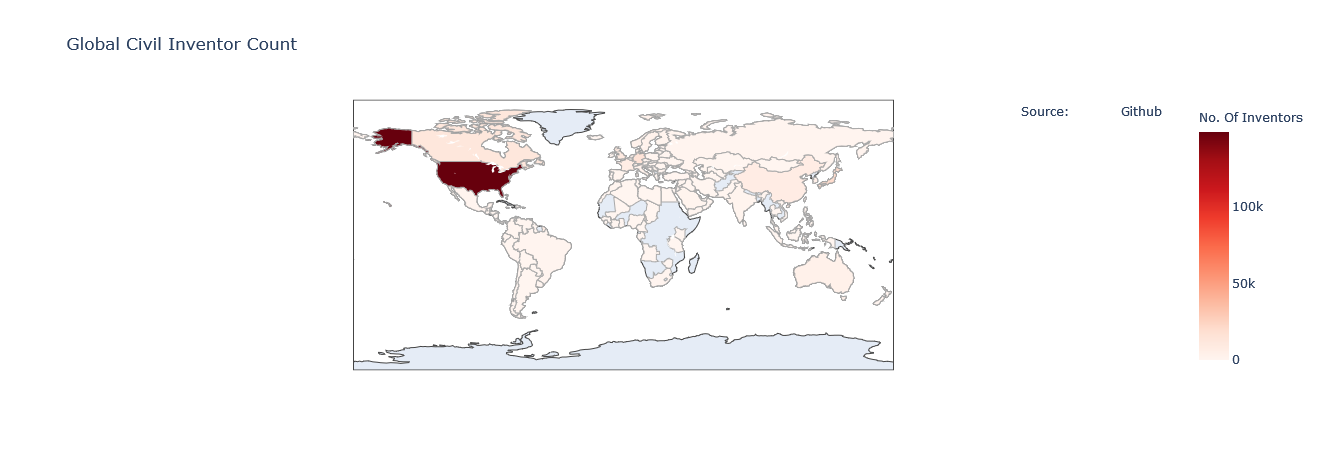

In [136]:
fig = go.Figure(data=go.Choropleth(
    locations = civil_world_joined['Alpha-3 code'],
    z = civil_world_joined['counts'].to_list(),
    text = civil_world_joined['Country'].to_list(),
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=1,
    colorbar_tickprefix = '',
    colorbar_title = 'No. Of Inventors',
))

fig.update_layout(
    title_text='Global Civil Inventor Count',
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=1,
        y=1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://github.com/uva-bi-sdad/uspto_gender_analysis">\
            Github</a>',
        showarrow = False
    )]
)

fig.show()

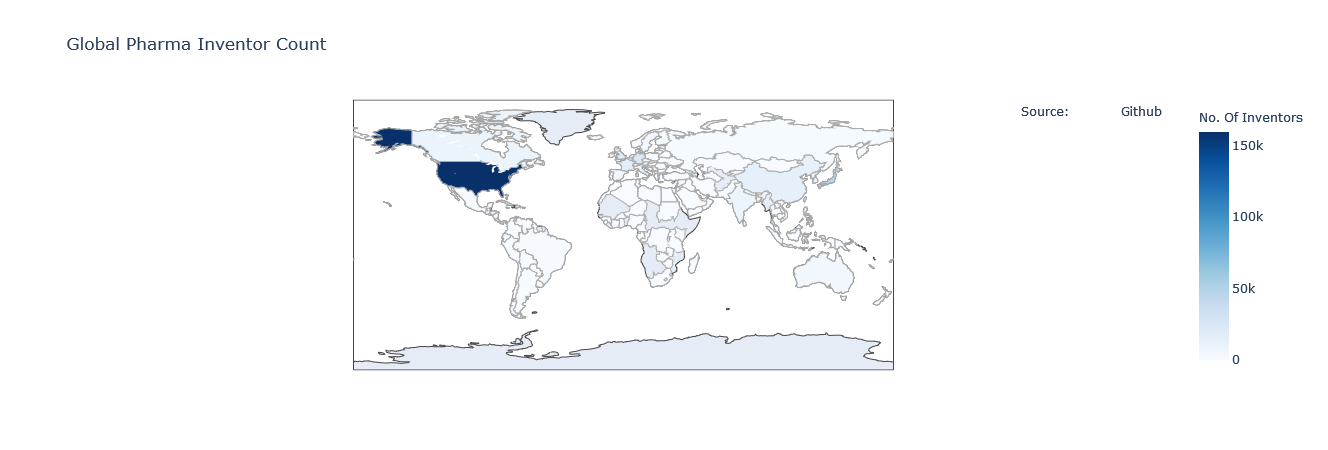

In [137]:
fig2 = go.Figure(data=go.Choropleth(
    locations = pharma_world_joined['Alpha-3 code'],
    z = pharma_world_joined['counts'].to_list(),
    text = pharma_world_joined['Country'].to_list(),
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=1,
    colorbar_tickprefix = '',
    colorbar_title = 'No. Of Inventors',
))

fig2.update_layout(
    title_text='Global Pharma Inventor Count',
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=1,
        y=1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://github.com/uva-bi-sdad/uspto_gender_analysis">\
            Github</a>',
        showarrow = False
    )]
)

fig2.show()

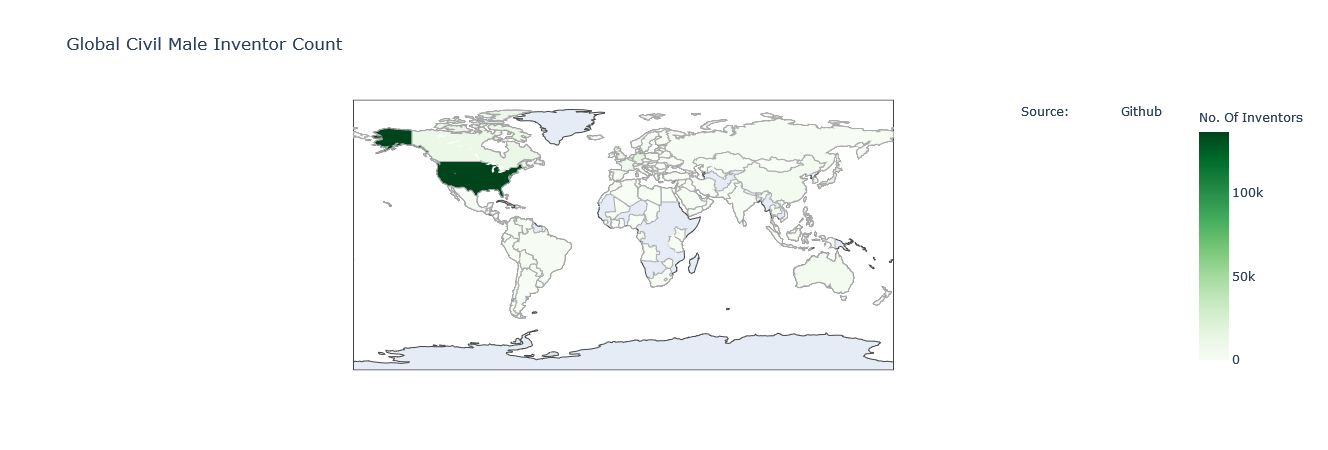

In [138]:
fig = go.Figure(data=go.Choropleth(
    locations = civil_inventors_male_world_joined['Alpha-3 code'],
    z = civil_inventors_male_world_joined['counts'].to_list(),
    text = civil_inventors_male_world_joined['Country'].to_list(),
    colorscale = 'Greens',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=1,
    colorbar_tickprefix = '',
    colorbar_title = 'No. Of Inventors',
))

fig.update_layout(
    title_text='Global Civil Male Inventor Count',
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=1,
        y=1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://github.com/uva-bi-sdad/uspto_gender_analysis">\
            Github</a>',
        showarrow = False
    )]
)

fig.show()

In [131]:
#civil_inventors_male_world_joined_df

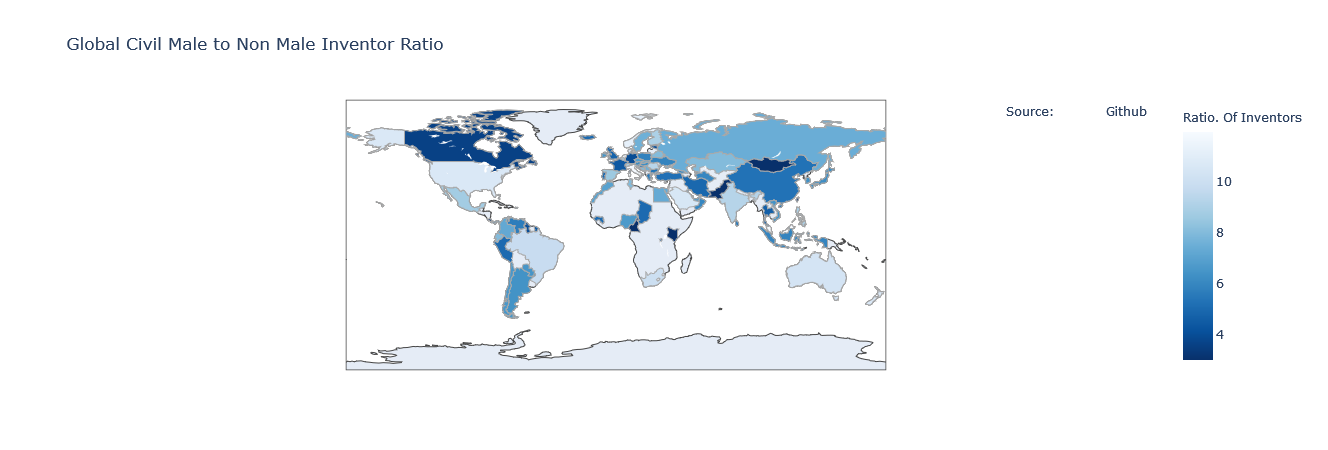

In [145]:
fig = go.Figure(data=go.Choropleth(
    locations = civil_inventors_non_male_world_joined['Alpha-3 code'],
    z = (civil_inventors_male_world_joined['counts']/civil_inventors_non_male_world_joined['counts']).to_list(),
    text = civil_inventors_non_male_world_joined['Country'].to_list(),
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=1,
    colorbar_tickprefix = '',
    colorbar_title = 'Ratio. Of Inventors',
))

fig.update_layout(
    title_text='Global Civil Male to Non Male Inventor Ratio',
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=1,
        y=1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://github.com/uva-bi-sdad/uspto_gender_analysis">\
            Github</a>',
        showarrow = False
    )]
)

fig.show()

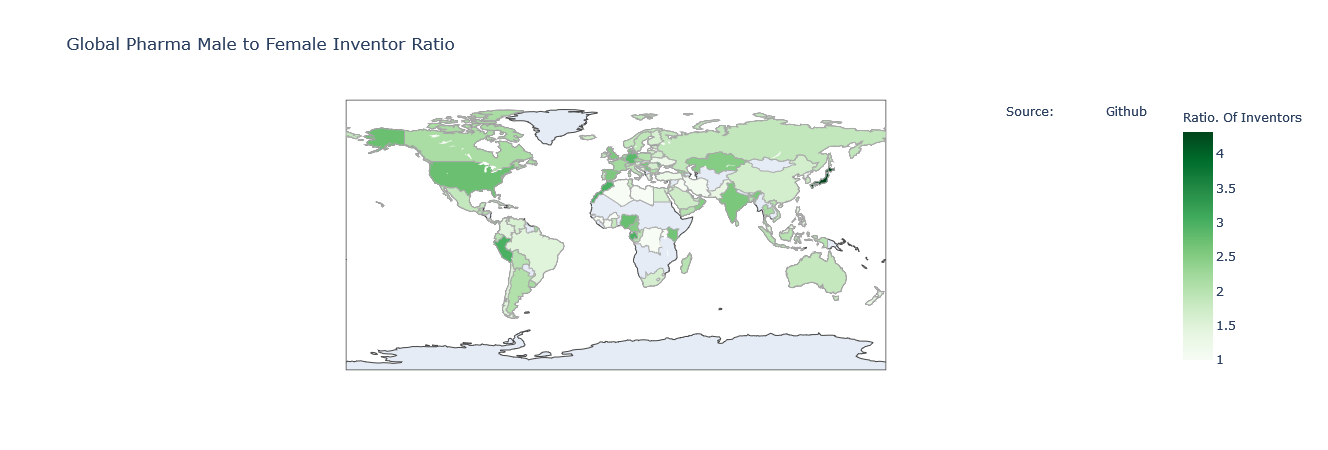

In [147]:
fig = go.Figure(data=go.Choropleth(
    locations = pharma_inventors_male_world_joined['Alpha-3 code'],
    z = (pharma_inventors_male_world_joined['counts']/pharma_inventors_non_male_world_joined['counts']).to_list(),
    text = pharma_inventors_male_world_joined['Country'].to_list(),
    colorscale = 'Greens',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=1,
    colorbar_tickprefix = '',
    colorbar_title = 'Ratio. Of Inventors',
))

fig.update_layout(
    title_text='Global Pharma Male to Female Inventor Ratio',
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=1,
        y=1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://github.com/uva-bi-sdad/uspto_gender_analysis">\
            Github</a>',
        showarrow = False
    )]
)

fig.show()

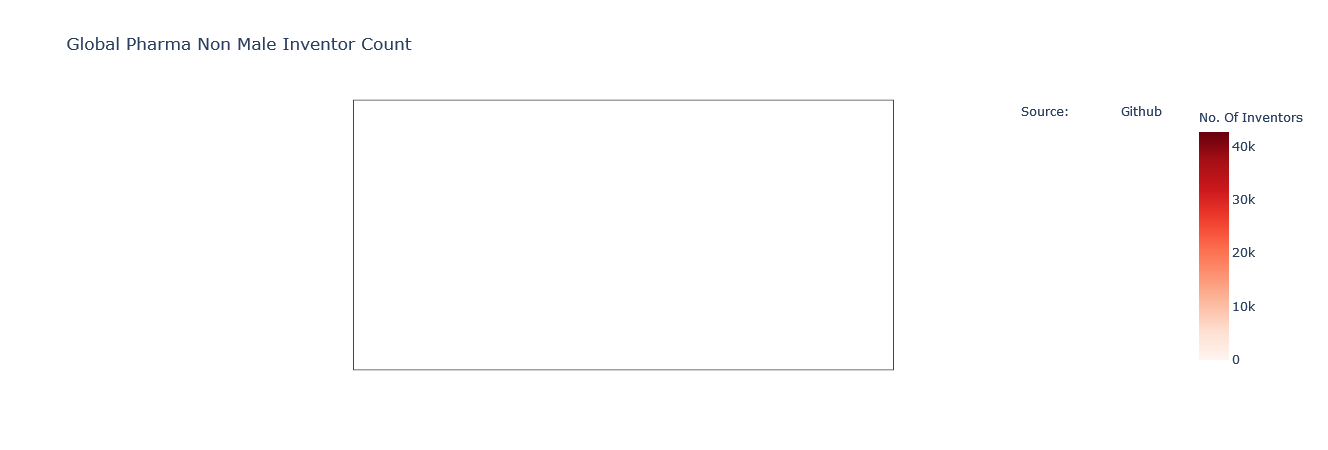

In [141]:
fig = go.Figure(data=go.Choropleth(
    locations = pharma_inventors_non_male_world_joined['Alpha-3 code'],
    z = pharma_inventors_non_male_world_joined['counts'].to_list(),
    text = pharma_inventors_non_male_world_joined['Country'].to_list(),
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=1,
    colorbar_tickprefix = '',
    colorbar_title = 'No. Of Inventors',
))

fig.update_layout(
    title_text='Global Pharma Non Male Inventor Count',
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=1,
        y=1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://github.com/uva-bi-sdad/uspto_gender_analysis">\
            Github</a>',
        showarrow = False
    )]
)

fig.show()